In [1]:
%matplotlib inline
import scipy.misc
import imageio
import matplotlib.pyplot as plt
import numpy as np

import skimage.transform
import random
import math
import os

In [2]:
input_size = 1000
output_size = 128
image_dir = 'C:/Users/mboer/Documents/Kennisnetwerk/tegels'
files = [i for i in os.listdir(image_dir) if i.endswith('.tif') and not i.startswith('Wat')]

In [3]:
from itertools import product
from keras.utils import to_categorical

batch_x = []
batch_y = []
for file_name in files:
    raw_x = imageio.imread(os.path.join(image_dir, file_name))
    raw_y = imageio.imread(os.path.join(image_dir, 'WaterVlakkenRasterUitBGT_' + file_name))

    #remove A in RGBA
    if raw_x.shape[2] > 3:
        raw_x = raw_x[:,:,:-1]

    
    for i, j in product(range(0, 1000-128, 128), range(0, 1000-128, 128)):
        x = raw_x[i:i + output_size, j:j + output_size]
        y = raw_y[i:i + output_size, j:j + output_size]
        
        x = np.true_divide(x, 255)

        if random.choice([True, False]):
            x = np.flip(x, axis=0)
            y = np.flip(y, axis=0)

        if random.choice([True, False]):
            x = np.flip(x, axis=1)
            y = np.flip(y, axis=1)
            
        y = to_categorical(np.round(y), num_classes=2)
            
        batch_x.append(x)
        batch_y.append(y)

batch_x = np.stack(batch_x, axis=0)
batch_y = np.stack(batch_y, axis=0)

Using TensorFlow backend.
C:\Python36\python-3.6.3.amd64\lib\site-packages\imageio\plugins\_tifffile.py:4513: UserWarning: unexpected end of lzw stream (code 514)
  warnings.warn("unexpected end of lzw stream (code %i)" % code)
C:\Python36\python-3.6.3.amd64\lib\site-packages\imageio\plugins\_tifffile.py:4513: UserWarning: unexpected end of lzw stream (code 0)
  warnings.warn("unexpected end of lzw stream (code %i)" % code)
C:\Python36\python-3.6.3.amd64\lib\site-packages\imageio\plugins\_tifffile.py:2567: UserWarning: invalid tile data
  warnings.warn("invalid tile data")


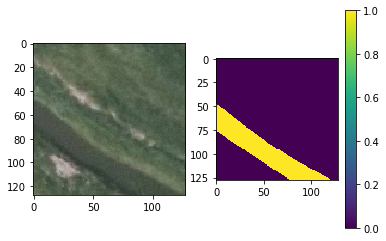

In [13]:
i = random.randint(0, len(batch_x))

plt.subplot(1, 2, 1)
plt.imshow(np.array(batch_x[i] * 255, dtype=np.uint8))

plt.subplot(1, 2, 2)
plt.imshow(batch_y[i,:,0].reshape(128, 128))
plt.colorbar()

In [43]:
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Flatten, BatchNormalization, Dropout, Reshape, Activation, Input
from keras.utils import plot_model

input_shape = (output_size, output_size, 3)

model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D())


model.add(UpSampling2D())
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(UpSampling2D())
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(UpSampling2D())
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(2, (1,1), activation='sigmoid', padding='same'))
model.add(Reshape((128**2, 2)))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_110 (Conv2D)          (None, 128, 128, 16)      448       
_________________________________________________________________
batch_normalization_35 (Batc (None, 128, 128, 16)      64        
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_111 (Conv2D)          (None, 64, 64, 8)         1160      
_________________________________________________________________
batch_normalization_36 (Batc (None, 64, 64, 8)         32        
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 32, 32, 8)         0         
_________________________________________________________________
conv2d_112 (Conv2D)          (None, 32, 32, 8)         584       
__________

In [44]:
from keras.optimizer import SGD
optimizer = SGD(lr=0.001, momentum=0.9, decay=0.0005, nesterov=False)
autoencoder.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=['accuracy'])

model.fit(batch_x, batch_y, validation_split=0.1)

Train on 1411 samples, validate on 157 samples
Epoch 1/10
1411/1411 [==============================] - 63s - loss: 0.5119 - acc: 0.8277 - val_loss: 0.6744 - val_acc: 0.6269
Epoch 2/10
1411/1411 [==============================] - 62s - loss: 0.4061 - acc: 0.9102 - val_loss: 0.6698 - val_acc: 0.6265
Epoch 3/10
1411/1411 [==============================] - 65s - loss: 0.3526 - acc: 0.9334 - val_loss: 0.6575 - val_acc: 0.6246
Epoch 4/10
1411/1411 [==============================] - 63s - loss: 0.3075 - acc: 0.9419 - val_loss: 0.5379 - val_acc: 0.8018
Epoch 5/10
1411/1411 [==============================] - 62s - loss: 0.2782 - acc: 0.9445 - val_loss: 0.4109 - val_acc: 0.8642
Epoch 6/10
1411/1411 [==============================] - 63s - loss: 0.2591 - acc: 0.9425 - val_loss: 0.6856 - val_acc: 0.5398
Epoch 7/10
1411/1411 [==============================] - 62s - loss: 0.2306 - acc: 0.9502 - val_loss: 0.2923 - val_acc: 0.9137
Epoch 8/10
1411/1411 [==============================] - 63s - loss: 0.2

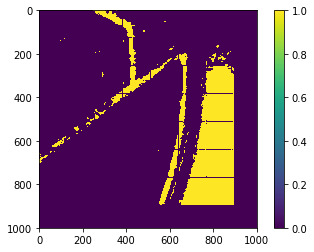

In [50]:
from itertools import product

data2 = imageio.imread('C:/Users/mboer/Documents/GitHub/Image-recognition/opdracht 2/tegels 100x100/data/2.tif')

indices = np.arange(0, 1000 // output_size) * output_size

cropped_data = []
for row, col in product(indices, repeat=2):
    cropped_data.append(data2[row:(row+output_size), col:(col+output_size)])
cropped_data = np.stack(cropped_data)

# plt.imshow(cropped_data[0])
pred = model.predict(cropped_data / 255.)
prediction = np.zeros((1000, 1000))
i = 0
for row, col in product(indices, repeat=2):
    prediction[row:(row+output_size), col:(col+output_size)] = pred[i, :, 0].reshape(128,128)
    i += 1
plt.imshow(np.round(prediction))
plt.colorbar()

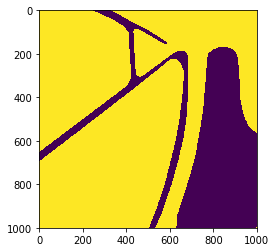

In [49]:
label2 = imageio.imread('C:/Users/mboer/Documents/GitHub/Image-recognition/opdracht 2/tegels 100x100/labels/2.tif')
plt.imshow(label2)